In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [44]:
try:
    df = pd.read_csv("loan_dataset_final.csv", encoding='latin1')
except UnicodeDecodeError:
    print("Failed to decode with 'latin1' encoding.")

In [45]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_title,emp_length,home_ownership,...,collections_12_mths_ex_med,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,race_name,gender
0,1000007,1225615,5150,5150,5150.0,60 months,132.58,atlantic tomorrows office,1 year,RENT,...,0.0,1.0,0.1864,0.873,2,709,0.147176,124.0,White,Female
1,1000030,1225638,20000,20000,20000.0,36 months,635.07,The Red Threads Inc.,6 years,RENT,...,0.0,0.0,0.0890,0.354,0,744,0.277778,149.0,African American,Female
2,1000033,1225642,12800,12800,12750.0,60 months,316.54,T-Mobile USA Inc,9 years,MORTGAGE,...,0.0,0.0,0.1677,0.754,0,719,0.156655,176.0,White,Female
3,1000045,1225655,14000,14000,14000.0,60 months,349.98,Trader Joe's,9 years,MORTGAGE,...,0.0,0.0,0.1727,0.357,0,714,0.194444,140.0,White,Female
4,1000067,1225680,15000,15000,14975.0,60 months,370.94,Truevance Engineering,< 1 year,RENT,...,0.0,0.0,0.1677,0.369,0,709,0.208333,136.0,White,Female


In [46]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'installment', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'pub_rec_bankruptcies', 'interest_rate',
       'revol_utilization', 'number_bc_gt_75', 'fico_score', 'lti',
       'month_since_oldest_tl', 'race_name', 'gender'],
      dtype='object')

In [47]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl
count,4.253500e+04,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,...,42535.000000,42535.000000,42390.0,41170.000000,42535.000000,42445.000000,42535.000000,42535.000000,42531.000000,42506.000000
mean,6.645799e+05,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,1.306357,...,100.307353,13.956737,0.0,0.045227,0.121650,0.442584,0.499988,723.065240,0.186105,107.567073
std,2.193022e+05,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,1.711415,...,718.078716,159.621861,0.0,0.208737,0.037079,0.306107,0.785378,30.241456,0.116228,58.874550
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.054200,0.000000,0.000000,619.000000,0.000789,1.000000
25%,4.983925e+05,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.096300,0.166000,0.000000,704.000000,0.097674,67.000000
50%,6.442500e+05,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.119900,0.446000,0.000000,719.000000,0.162813,98.000000
75%,8.258225e+05,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,...,0.000000,0.000000,0.0,0.000000,0.147200,0.701000,1.000000,739.000000,0.250000,134.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,...,29623.350000,7002.190000,0.0,2.000000,0.245900,1.088000,3.000000,829.000000,1.337500,685.000000


In [48]:
for column in df.columns:
    print(f"For column {column}: No of unique values = {len(df[column].unique())}")

For column id: No of unique values = 42535
For column member_id: No of unique values = 42535
For column loan_amnt: No of unique values = 898
For column funded_amnt: No of unique values = 1051
For column funded_amnt_inv: No of unique values = 9240
For column term: No of unique values = 2
For column installment: No of unique values = 16459
For column emp_title: No of unique values = 30447
For column emp_length: No of unique values = 12
For column home_ownership: No of unique values = 5
For column annual_inc: No of unique values = 5598
For column verification_status: No of unique values = 3
For column issue_d: No of unique values = 55
For column loan_status: No of unique values = 9
For column pymnt_plan: No of unique values = 2
For column desc: No of unique values = 28948
For column purpose: No of unique values = 14
For column title: No of unique values = 20964
For column addr_state: No of unique values = 50
For column dti: No of unique values = 2894
For column delinq_2yrs: No of unique v

In [49]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'NONE', 'OTHER'], dtype=object)

In [50]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
installment                       0
emp_title                      2626
emp_length                     1112
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
desc                          13521
purpose                           0
title                            13
addr_state                        0
dti                               0
delinq_2yrs                      29
inq_last_6mths                   29
mths_since_last_delinq        26926
mths_since_last_record        38884
open_acc                         29
pub_rec                          29
revol_bal                         0
total_acc                   

In [51]:
df = df.replace(['1 year', '6 years', '9 years', '< 1 year', '8 years', '10+ years', '5 years', '2 years', '3 years', '4 years', '7 years'],
                [1, 6, 9, 0, 8, 10, 5, 2, 3, 4, 7])

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_title,emp_length,home_ownership,...,collections_12_mths_ex_med,pub_rec_bankruptcies,interest_rate,revol_utilization,number_bc_gt_75,fico_score,lti,month_since_oldest_tl,race_name,gender
0,1000007,1225615,5150,5150,5150.0,60 months,132.58,atlantic tomorrows office,1.0,RENT,...,0.0,1.0,0.1864,0.873,2,709,0.147176,124.0,White,Female
1,1000030,1225638,20000,20000,20000.0,36 months,635.07,The Red Threads Inc.,6.0,RENT,...,0.0,0.0,0.0890,0.354,0,744,0.277778,149.0,African American,Female
2,1000033,1225642,12800,12800,12750.0,60 months,316.54,T-Mobile USA Inc,9.0,MORTGAGE,...,0.0,0.0,0.1677,0.754,0,719,0.156655,176.0,White,Female
3,1000045,1225655,14000,14000,14000.0,60 months,349.98,Trader Joe's,9.0,MORTGAGE,...,0.0,0.0,0.1727,0.357,0,714,0.194444,140.0,White,Female
4,1000067,1225680,15000,15000,14975.0,60 months,370.94,Truevance Engineering,0.0,RENT,...,0.0,0.0,0.1677,0.369,0,709,0.208333,136.0,White,Female


In [52]:
df = df.replace(['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Charged Off', 'In Grace Period', 
                 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off', 'Default'],
                 [1, 0, 2, 8, 3, 5, 4, 6, 7])

In [53]:
# assuming that those who did not specify their working duration, have been working for less than a year
df['emp_length'] = df['emp_length'].fillna(0)

In [54]:
df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].mean())

df['Division'] = df['loan_amnt'] / df['annual_inc']
df['lti'] = df['lti'].fillna(df['Division'])


df = df.drop(columns=['Division'])

df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].max()*5)
df['mths_since_last_record'] = df['mths_since_last_record'].fillna(df['mths_since_last_record'].max()*5)
df['month_since_oldest_tl'] = df['month_since_oldest_tl'].fillna(df['month_since_oldest_tl'].max()*5)

df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(0)
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(0)
df['open_acc'] = df['open_acc'].fillna(0)
df['pub_rec'] = df['pub_rec'].fillna(0)
df['total_acc'] = df['total_acc'].fillna(0)
# df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)
df['revol_utilization'] = df['revol_utilization'].fillna(0)

In [55]:
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
installment                       0
emp_title                      2626
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
desc                          13521
purpose                           0
title                            13
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
mths_since_last_delinq            0
mths_since_last_record            0
open_acc                          0
pub_rec                           0
revol_bal                         0
total_acc                   

In [56]:
len(df['loan_status']), len(df['emp_length'])

(42535, 42535)

In [57]:
counts = df.groupby(['emp_length', 'loan_status']).size().reset_index(name='count')

counts

,emp_length,loan_status,count
0,0.0,0,4743
1,0.0,1,49
2,0.0,2,381
3,0.0,3,4
4,0.0,4,1
...,...,...,...
68,10.0,2,314
69,10.0,3,6
70,10.0,5,6
71,10.0,6,156


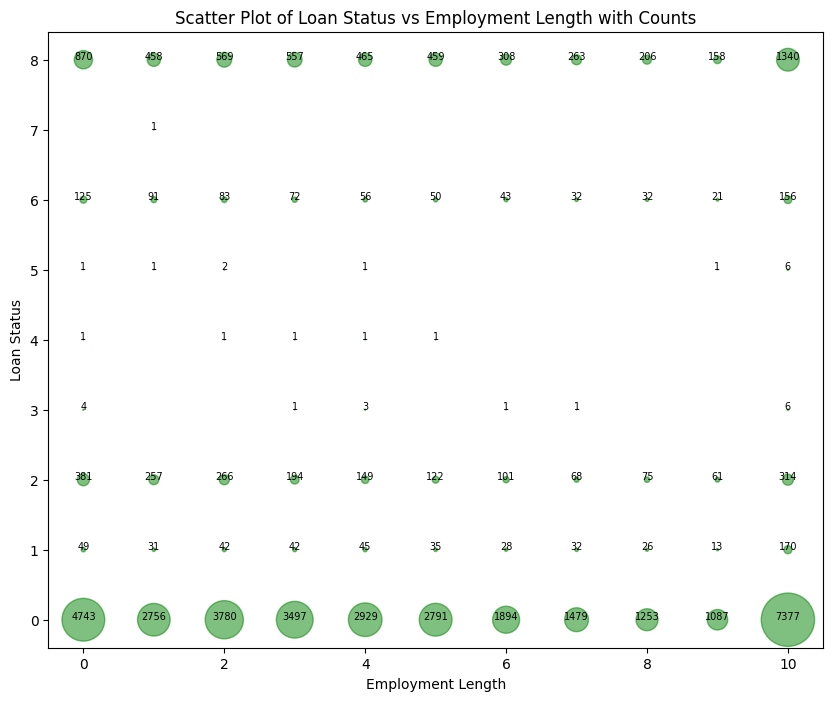

In [58]:
# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x=counts['emp_length'], y=counts['loan_status'], s=counts['count']*0.2, alpha=0.5, color='green')

# Annotate each point with the count
for i in range(len(counts)):
    plt.text(counts['emp_length'][i], counts['loan_status'][i], counts['count'][i],
             fontsize=7, ha='center', color='black')

plt.xlabel('Employment Length')
plt.ylabel('Loan Status')
plt.title('Scatter Plot of Loan Status vs Employment Length with Counts')
plt.show()

In [59]:
# Group by home_ownership and loan_status, and count the occurrences
grouped = df.groupby(['home_ownership', 'loan_status']).size().unstack(fill_value=0)

grouped

loan_status,0,1,2,3,4,5,6,7,8
home_ownership,,,,,,,,,
MORTGAGE,15052,290,908,8,3,5,348,1,2344
NONE,3,0,4,0,0,0,1,0,0
OTHER,80,0,27,0,0,0,11,0,18
OWN,2583,33,138,2,1,0,49,0,445
RENT,15868,190,911,6,1,7,352,0,2846


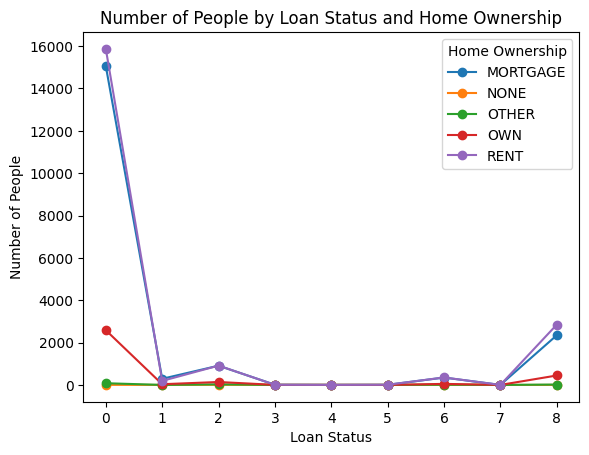

In [60]:
# Plot the data
grouped.T.plot(kind='line', marker='o')

plt.xlabel('Loan Status')
plt.ylabel('Number of People')
plt.title('Number of People by Loan Status and Home Ownership')
plt.legend(title='Home Ownership')
plt.show()

In [78]:
# Group by home_ownership and loan_status, and count the occurrences
grouped = df.groupby(['race_name', 'loan_status']).size().unstack(fill_value=0)

grouped

loan_status,0,1,2,3,4,5,6,7,8
race_name,,,,,,,,,
African American,5579,90,357,2,2,6,118,0,964
Asian,11195,182,642,7,0,2,261,0,1860
Other,5599,77,343,1,1,1,122,0,964
White,11213,164,646,6,2,3,260,1,1865


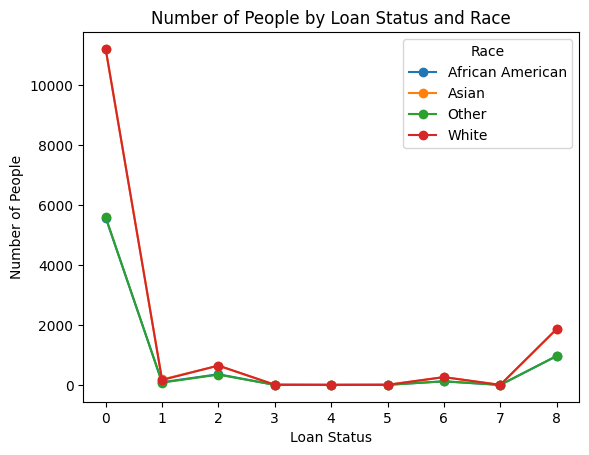

In [79]:
grouped.T.plot(kind='line', marker='o')

plt.xlabel('Loan Status')
plt.ylabel('Number of People')
plt.title('Number of People by Loan Status and Race')
plt.legend(title='Race')
plt.show()

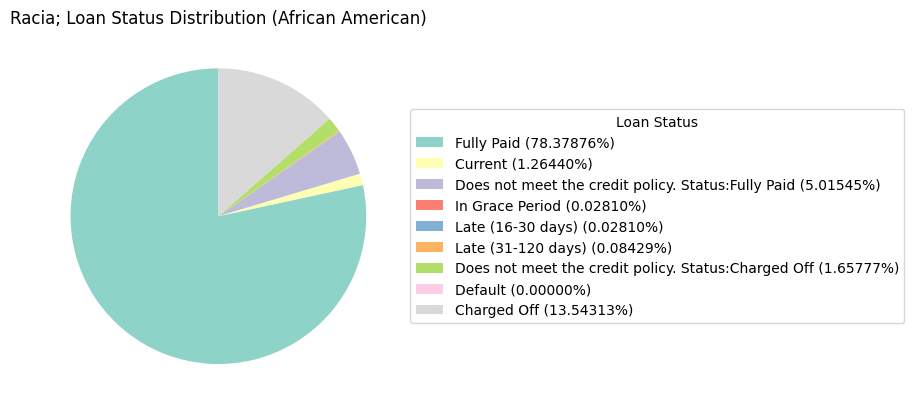

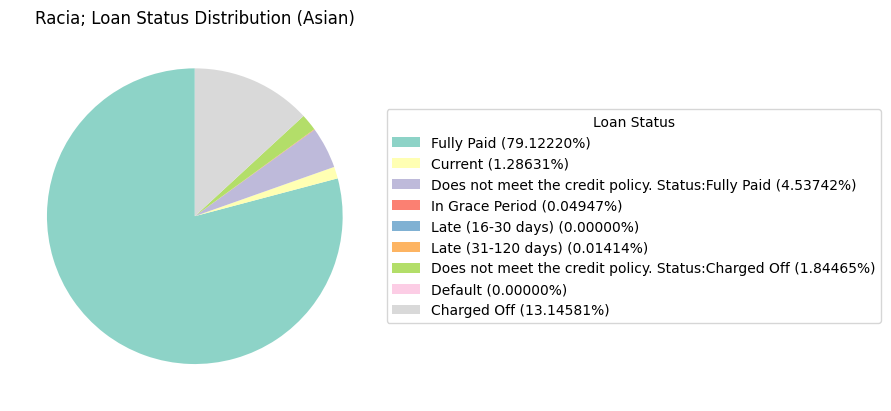

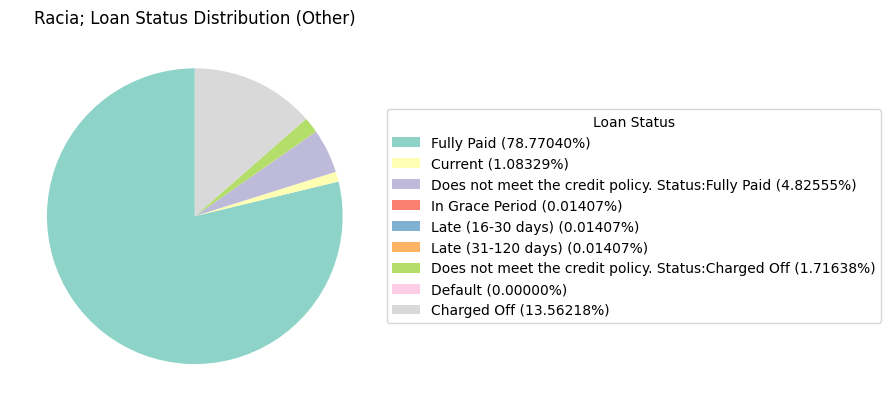

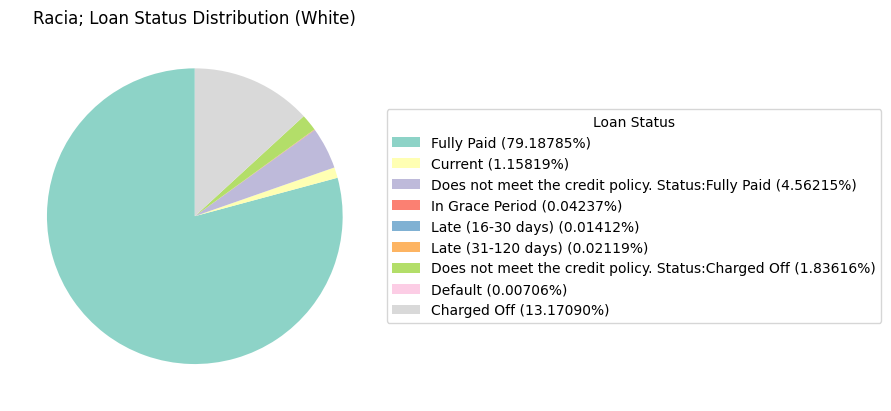

In [80]:
# Group data by Gender and Loan_Status
race_status_counts = df.groupby(['race_name', 'loan_status']).size().unstack(fill_value=0)

def create_pie_chart(race, data, colormap='Set3'):
    plt.figure()

    # colors = plt.cm.set3(range(len(data)))
    
    wedges, _ = plt.pie(data, labels=None, startangle=90, colors=matplotlib.colormaps.get_cmap(colormap)(range(len(data))))
    plt.title(f"Racia; Loan Status Distribution ({race})")
    
    # Calculate percentages
    total = data.sum()
    percentages = [f"{(value / total) * 100:.5f}%" for value in data]
    
    # Create legend labels with categories and their percentages
    legend_labels = [f"{sorted_dict[i]} ({percentage})" for i, percentage in zip(data.index, percentages)]
    
    # Add legend outside of the pie chart
    plt.legend(wedges, legend_labels, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.show()

# Create pie charts for each gender
for gender, data in race_status_counts.iterrows():
    create_pie_chart(gender, data)

In [61]:
res = dict(zip([1, 0, 2, 8, 3, 5, 4, 6, 7],
               ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Charged Off', 'In Grace Period', 
                 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off', 'Default']))

myKeys = list(res.keys())
myKeys.sort()
sorted_dict = {i: res[i] for i in myKeys}

sorted_dict

{0: 'Fully Paid',
 1: 'Current',
 2: 'Does not meet the credit policy. Status:Fully Paid',
 3: 'In Grace Period',
 4: 'Late (16-30 days)',
 5: 'Late (31-120 days)',
 6: 'Does not meet the credit policy. Status:Charged Off',
 7: 'Default',
 8: 'Charged Off'}

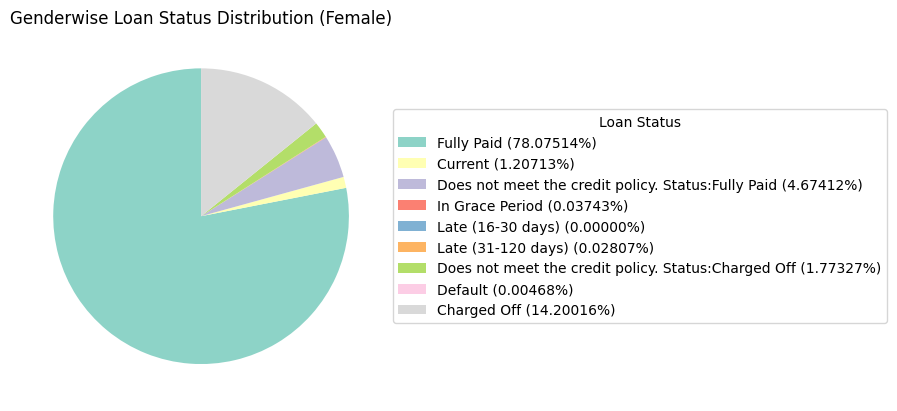

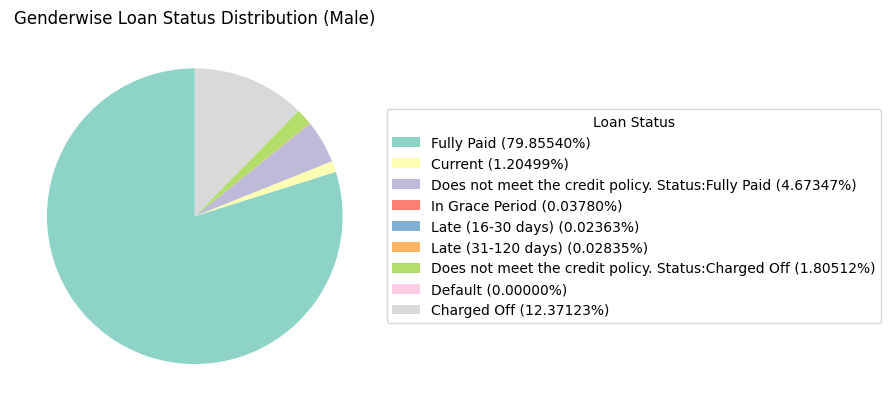

In [75]:
# Group data by Gender and Loan_Status
gender_status_counts = df.groupby(['gender', 'loan_status']).size().unstack(fill_value=0)

def create_pie_chart(gender, data, colormap='Set3'):
    plt.figure()

    # colors = plt.cm.set3(range(len(data)))
    
    wedges, _ = plt.pie(data, labels=None, startangle=90, colors=matplotlib.colormaps.get_cmap(colormap)(range(len(data))))
    plt.title(f"Genderwise Loan Status Distribution ({gender})")
    
    # Calculate percentages
    total = data.sum()
    percentages = [f"{(value / total) * 100:.5f}%" for value in data]
    
    # Create legend labels with categories and their percentages
    legend_labels = [f"{sorted_dict[i]} ({percentage})" for i, percentage in zip(data.index, percentages)]
    
    # Add legend outside of the pie chart
    plt.legend(wedges, legend_labels, title="Loan Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.show()

# Create pie charts for each gender
for gender, data in gender_status_counts.iterrows():
    create_pie_chart(gender, data)